###todo: add more variables from public data : time?
###change settings on SVR

### Sky cover, relative humidity, precipitation, temperature, dew point, wind speed

Short term weather forecasts for next day as well as for next three days

 Photovoltaic, meteorological and radiative measurements at SIRTA
 ####Col 7: Measured solar irradiance on the plane of the panels (27.7�)(zone 1)
 ####Col 12: 2-m Air temperature (zone 1)
 ####Col 14: 10-m Wind speed (zone 1)
 
Tuning hyper-parameters for R^2 Score (time irr)
Best parameters set found on development set:
{'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
Detailed report:
0.178399326674

### Tuning hyper-parameters for R2 Score (irr p1)
Best parameters set found on development set:
{'C': 10, 'kernel': 'rbf', 'gamma': 1}
R2 Score:
0.965792921757

In [30]:
# IMPORT MODULES

%matplotlib inline

import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import calendar

import sklearn.preprocessing as pp
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import pandas as pd

In [50]:
# READ DATA
data = pd.read_csv("DonneesMeteo.txt", sep=" ", header=1)
data["Date"] = pd.to_datetime(data["Date"], format="%Y%m%d")
#data["hh(UTC)"] = pd.to_datetime(data["hh(UTC)"], format="%H.")
data.corr()["IrrPOA(W/m2)"].copy

<bound method Series.copy of hh(UTC)         0.067896
P1(W)           0.978788
Tp1(C)          0.877854
P2(W)           0.946334
Tp2(C)          0.887659
IrrPOA(W/m2)    1.000000
Gz2(W/m2)       0.935867
Drz2(W/m2)      0.742277
Dfz2(W/m2)      0.465443
IRz2(W/m2)     -0.312442
T(C)            0.445935
WS(m/s)         0.100728
WD(deg)        -0.066355
mpGz1(W/m2)     0.986494
IRz1dn(W/m2)    0.037813
IRz1up(W/m2)    0.714713
mpT(C)          0.486023
mpWS(m/s)       0.109376
mpWD(deg)       0.089693
SZA(deg)       -0.657084
SAA(deg)        0.062906
Name: IrrPOA(W/m2), dtype: float64>

In [3]:
dataset = np.array(data[["hh(UTC)", "IrrPOA(W/m2)", "P1(W)"]]).astype(np.float)

#Remove nan and infinite values
masknan = ~np.any(np.isnan(dataset), axis=1)
dataset = dataset[masknan]
maskfin = np.any(np.isfinite(dataset), axis=1)
dataset = dataset[maskfin]
X=dataset[:,0:2]
y=dataset[:,2]

X = np.reshape(X,(len(X),2))

#SCALE INDEPENDENT DATA - no need here, because time is regular?
X=pp.StandardScaler().fit_transform(X)

In [4]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [8]:
print("# Tuning hyper-parameters for R2 Score")

clf = SVR(C=10, kernel='rbf', gamma= 1);
clf.fit(X_training, y_training)

print("R2 Score:")
y_true, y_pred = y_test, clf.predict(X_test)
print(r2_score(y_true, y_pred))

# Tuning hyper-parameters for R2 Score
R2 Score:
0.965792921757


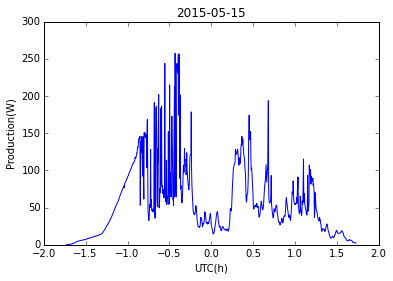

In [58]:
dayY=data["P1(W)"][data["Date"]=="2015-05-15"]
dayX = pp.StandardScaler().fit_transform(data[["hh(UTC)", "IrrPOA(W/m2)"]][data["Date"]=="2015-05-15"])

plt.title("2015-05-15")
plt.xlabel('UTC(h)')
plt.ylabel('Production(W)')
plt.plot(dayX[:,0],dayY)
plt.show()

In [63]:
preddayY=clf.predict(dayX)

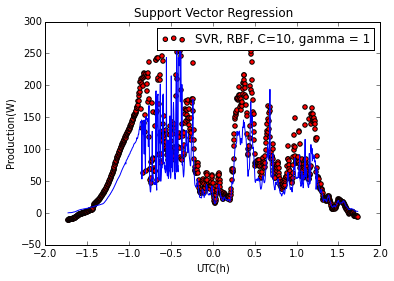

R2 Score:
0.422694221331
Mean Squared Error:
1312.24072001


In [67]:
plt.scatter(dayX[:,0], preddayY, c='r', label='SVR, RBF, C=10, gamma = 1')
plt.plot(dayX[:,0],dayY)
plt.xlabel('UTC(h)')
plt.ylabel('Production(W)')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

print("R2 Score:")
print(r2_score(dayY,preddayY))

print("Mean Squared Error:")
print(mean_squared_error(dayY,preddayY))